# Datacamp Search Engine Marketing Campaigns

As a heavy user of Datacamp since two years, I learned quite a lot. My main business is in online marketing, and I have benefited a lot from the data science skills I learned. I'm now able to manage way larger and more complex campaigns, and efficiently maintain them. Since I'm quite familiar now with the content and the different topics and packages in R and Python, I thought about how I might create search campaigns for Datacamp, just as an exercise. Hopefully, this serves as a real life example of how these skills are used in real projects.    
Here goes. 

The three main components of a search campaign are:     
1. **Keywords:** the user's intention, what they are looking for.     
2. **Ads:** your promise to the user for that intention.    
3. **Landig pages:** your delivery of the promise.    

Mapping those three elements properly is around 70-80% of the job. If you get this right, then  maintenance and changes become much easier. 

So, in order to be specific and relevant to users, we need to promote the stuff that we have, and mainly focus on sending the right person to the right page, through the right message / expectation. 

A good campaign structure reflects and follows the structure of the website, which is essentially reflecting the business strategy. 

The basic unit of organization is called the ad group. This is where the mapping of keywords, ads and landing pages happens. Every ad group needs to be part of a campaign. At the campaign level we have settings that govern all ad groups in the campaign; language targeting, locations, devices, time of day, etc. 

![](adgroup_diagram.png)

As shown above this is the mapping that we want to achieve. As output, we want to end up having two main data frames, one for keywords and another for ads, something like the two data frames below.    
Once these are done, we would be ready to upload them as csv files to Google AdWords (other platforms works exactly the same way, but with minor tweaks needed (Bing, Yahoo, Yandex, etc).

#### Keywords

|Campaign  |Ad Group |Keyword  |
|----------|---------|---------|
|campaign 1|adgroup 1|keyword 1|
|campaign 1|adgroup 2|keyword 2|
|campaign 2|adgroup 1|keyword 3|
|campaign 2|adgroup 1|keyword 4|
|campaign 2|adgroup 2|keyword 5|

#### Ads

|Campaign   |Ad Group  | Display URL  | Final URL      | Headline 1 | Headline 2  |
|-----------|----------|--------------|----------------|------------|-------------|
|campaign 1 |adgroup 1 | datacamp.com | datacamp.com/a | Headline 1 | Headline 1a |
|campaign 1 |adgroup 2 | datacamp.com | datacamp.com/b | Headline 1 | Headline 1a |
|campaign 2 |adgroup 1 | datacamp.com | datacamp.com/c | Headline 1 | Headline 1a |
|campaign 2 |adgroup 2 | datacamp.com | datacamp.com/d | Headline 2 | Headline 2a |
|campaign 2 |adgroup 3 | datacamp.com | datacamp.com/e | Headline 3 | Headline 1a |

Looking at the different ways in which someone can express interest in something that we provide, here is an initial list of some of those ways:    

1. **Instructors**: 'Hadley Wickham course', 'courses by Garrett Grolemund', etc
2. **Technologies**: 'python course', 'r courses', 'sql data science course', etc
3. **Courses**: names of specific courses that we have; 'unsupervised learning in python', 'deep learning in python', etc.
4. **Topics**: 'machine learning courses', 'data visualization course', etc
5. **Packages / libraries**: 'learn ggplot', 'matplotlib tutorial', etc

You will notice in setting up the keywords that I won't go through the traditional keyword research phase, and that's because we have the power of the programming language to generate all possible combinations and group them in their respective campaigns and ad group. 

Therefore, we need two main things to know in order to do this setup: 
1. Product knowledge: knowing what courses and topics we have, how they are organized on the website, and how they are grouped. This we can see by browsing, and we can defnitely get better insights with internal knowledge (especially if there are changes planned!).
2. Relevant keywords: all the possible ways in which someone might express desire in the things that we provide; 'course', 'learn', 'education', 'tutorial', etc. This can be done by brainstorming, looking into keyword tools, and other methods. 

Let's start by generating the keywords.

## Keyword Generation

## 1. Instructors
This campaign will be targeting people who search for courses by any of the instructors at Datacamp. 
We can have the keywords restricted to "`course by <instructor name>`" or we can go for a broad set of keywords targeting the instructor name only. At the beginning, it's better to target the names with 'course' or 'courses' and see the effect.    
We will also need to check if any of the names that we have also happens to be the name of another famous person, or a very common name, and then we will need to restrict the keywords for that instructor. 

We begin by getting the names of the instructors and the URLs for each:

In [1]:
import requests
from bs4 import BeautifulSoup


instructors_page = 'https://www.datacamp.com/instructors?all=true'
instructor_link_selector = '.instructor-block__description .instructor-block__link' # CSS class of the link
instructor_name_selector = '.mb-sm'  # CSS class of the name

instructor_resp = requests.get(instructors_page)
soup = BeautifulSoup(instructor_resp.text, 'lxml')

instructor_urls = [url['href'] for url in soup.select(instructor_link_selector)]
instructor_names = [name.text.strip() for name in soup.select(instructor_name_selector)]
instructor_urls = ['https://www.datacamp.com' + url for url in instructor_urls]

We put them in a data frame for later use. The URLs will be used later for generating ads.

In [2]:
instructor_df = pd.DataFrame({
    'name': instructor_names,
    'url': instructor_urls
})
print(instructor_df.shape)
instructor_df.head()

(65, 2)


,name,url
0,Filip Schouwenaars,https://www.datacamp.com/instructors/filipsch
1,Jonathan Cornelissen,https://www.datacamp.com/instructors/jonathana...
2,Hugo Bowne-Anderson,https://www.datacamp.com/instructors/hugobowne
3,Nick Carchedi,https://www.datacamp.com/instructors/nickyc
4,Greg Wilson,https://www.datacamp.com/instructors/greg48f64...


### Generate Instructor Keywords

Now that we have the names of instructors, we will be using a template whereby we combine each name with a set of keywords related to our topic, which is mainly courses by the instructor. 

Variables used in the code below:

`col_names`: This is a list of the header names of the table that we will end up uploading to Google AdWords.    
`words`: The words that we will be combining with the instructor names to generate the full keywords / phrases.     
`match_types`: More details can be found on [AdWords help center](https://support.google.com/adwords/answer/2497836?hl=en), but here are the basics.     
[data science course], "data science course", and data science course are technically three different keywords.
- exact match (in brackets), will only trigger ads if a user searches for exactly that keyword, 'data science course', for example, written exactly like this.
- phrase match (with quotes) , will trigger our ads if a user searches for the exact string together with anything before, or after it. So "best data science course", or "data science course online" would trigger our ads. 
- broad match (no punctuation) would trigger our ads if someone searches for anything similar to or related to 'data science course'. This is up to Google's algorithms, and you have to be careful with it, as it might trigger ads when someone searches for 'data science platform' for example, which is not exactly what we are trying to promote. I like to use the modified broach match more, because it restricts targeting a little more. This is basically triggering ads if someoe searches for any derivative of the word, and not any similar word in meaning. This is denoted with a '+' sign at the begininning of the word. So, '+game' would trigger ads by 'gaming', 'gamers', but by 'play'. 



In [3]:
col_names = ['Campaign', 'Ad Group', 'Keyword', 'Criterion Type']
instructor_keywords = []

words = ['course', 'courses', 'learn', 'data science', 'data camp', 'datacamp']
match_types = ['Exact', 'Phrase', 'Broad']
for instructor in instructor_df['name']:
    for word in words:
        for match in match_types:
            if match == 'Broad':
                keyword = '+' + ' +'.join([instructor.replace(' ', ' +').lower(), word])  # modified broach match
            else:
                keyword = instructor.lower() + ' ' + word
            row = ['SEM_Instructors',  # campaign name
                   instructor,  # ad group name
                   keyword, # instructor <keyword>
                   match]  # keyword match type
            instructor_keywords.append(row)

# do the same by having the keywords come before the instructor name
for instructor in instructor_df['name']:
    for word in words:
        for match in match_types:
            if match == 'Broad':
                keyword = '+' + ' +'.join([word, instructor.replace(' ', ' +').lower()])
            else:
                keyword = word + ' ' + instructor.lower() 
            row = ['SEM_Instructors',  # campaign name
                   instructor,  # ad group name
                   keyword, # <keyword> instructor 
                   match]  # keyword match type
            instructor_keywords.append(row)
            

instructor_keywords_df = pd.DataFrame.from_records(instructor_keywords, 
                                                   columns=col_names)
print('total keywords:', instructor_keywords_df.shape[0])
instructor_keywords_df.head()

total keywords: 2340


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Exact
1,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Phrase
2,SEM_Instructors,Filip Schouwenaars,+filip +schouwenaars +course,Broad
3,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Exact
4,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Phrase


Basically, what are doing is looping over the instructor names, all the different keywords, and all the match types that we have, so that we have all possible combinations. We are doing it twice, once to have the template 'instructor name keyword' and 'keyword instructor name'. 

Now we simply repeat the same for all of our segments with minor modifications on keywords, and how we extract the data.    
A good guideline I learned from [R for Data Science](http://r4ds.had.co.nz/functions.html) is that if you are going to copy and paste more than twice, it's time to write a function! 

In [4]:
def generate_keywords(topics, keywords, match_types=['Exact', 'Phrase', 'Broad'],
                     campaign='SEM_Campaign'):
    col_names = ['Campaign', 'Ad Group', 'Keyword', 'Criterion Type']
    campaign_keywords = []
    
    for topic in topics:
        for word in keywords:
            for match in match_types:
                if match == 'Broad':
                    keyword = '+' + ' +'.join([topic.lower().replace(' ', ' +'), word.replace(' ', ' +')])
                else:
                    keyword = topic.lower() + ' ' + word
                row = [campaign,  # campaign name
                       topic,  # ad group name
                       keyword, # instructor <keyword>
                       match]  # keyword match type
                campaign_keywords.append(row)

    # I said more than twice! :)             
    for topic in topics:
        for word in keywords:
            for match in match_types:
                if match == 'Broad':
                    keyword = '+' + ' +'.join([word.replace(' ', ' +'), topic.lower().replace(' ', ' +')])
                else:
                    keyword = word + ' ' + topic.lower()
                row = [campaign,  # campaign name
                       topic,  # ad group name
                       keyword, # <keyword> instructor
                       match]  # keyword match type
                campaign_keywords.append(row)

    return pd.DataFrame.from_records(campaign_keywords, columns=col_names)


Let's give it a try:

In [5]:
topics = ['Data Science', 'Machine Learning']
keywords = ['course', 'tutorial']
generate_keywords(topics, keywords).head(10)

,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Campaign,Data Science,data science course,Exact
1,SEM_Campaign,Data Science,data science course,Phrase
2,SEM_Campaign,Data Science,+data +science +course,Broad
3,SEM_Campaign,Data Science,data science tutorial,Exact
4,SEM_Campaign,Data Science,data science tutorial,Phrase
5,SEM_Campaign,Data Science,+data +science +tutorial,Broad
6,SEM_Campaign,Machine Learning,machine learning course,Exact
7,SEM_Campaign,Machine Learning,machine learning course,Phrase
8,SEM_Campaign,Machine Learning,+machine +learning +course,Broad
9,SEM_Campaign,Machine Learning,machine learning tutorial,Exact


Looks good. Now we let's generate the relevant topics and keywords for each of our segments

## 2. Technologies

In [6]:
topics = ['R', 'Python', 'SQL', 'Git', 'Shell']  # listed on the /courses page
keywords = ['data science', 'programming', 'analytics', 'data analysis', 'machine learning',
            'deep learning', 'financial analysis', 'data viz', 'visualization', 'data visualization',
            'learn', 'course', 'courses', 'education', 'data import', 'data cleaning', 
            'data manipulation', 'probability', 'stats', 'statistics', 'course', 'courses',
           'learn', 'education', 'tutorial']  # @marketing_team: this list can / should be refined or 
                                              # expanded based on the strategy and how specific the 
                                              # targeting needs to be
tech_keywords = generate_keywords(topics, keywords, campaign='SEM_Technologies')
print('total keywords:', tech_keywords.shape[0])
tech_keywords.head()

total keywords: 750


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Technologies,R,r data science,Exact
1,SEM_Technologies,R,r data science,Phrase
2,SEM_Technologies,R,+r +data +science,Broad
3,SEM_Technologies,R,r programming,Exact
4,SEM_Technologies,R,r programming,Phrase


## 3. Courses

This is probably the most specific, and therefore the most relevant of the segments to target people. If someone is searching for "data visualization with r" and we have that course, then the ad would be extremely relevant, because we would have the right landing page that exactly satisfies that user's need. 

One small problem. Some of the course names don't correspond to what a user would typically search for:
'Machine Learning with the Experts: School Budgets', 'Sentiment Analysis in R: The Tidy Way'. These are NOT bad course names. They just need some attention as to selecting the proper keywords that people might use to search for them. 

Again, we can scrape the names and correspnding URLs as we did with the instructors' campaign. 


In [7]:
courses_page = 'https://www.datacamp.com/courses/all'
course_link_selector = '.courses__explore-list .course-block'

course_resp = requests.get(courses_page)
soup = BeautifulSoup(course_resp.text, 'lxml')

course_urls = [link.contents[1]['href'] for link in soup.select(course_link_selector)] 
course_urls = ['https://www.datacamp.com' + url for url in course_urls]
course_names = [link.h4.text for link in soup.select(course_link_selector)]

In [8]:
course_df = pd.DataFrame({
    'name': course_names,
    'url': course_urls
})
course_df['name_clean'] = course_df.name.str.replace('\(.*\)', '').str.strip()  # remove (part x)
print('total keywords:', course_df.shape[0])
course_df.head()

total keywords: 95


,name,url,name_clean
0,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Intro to Python for Data Science
1,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Introduction to R
2,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,Intermediate Python for Data Science
3,Intro to SQL for Data Science,https://www.datacamp.com/courses/intro-to-sql-...,Intro to SQL for Data Science
4,Intermediate R,https://www.datacamp.com/courses/intermediate-r,Intermediate R


We will do the same (use the `generate_keywords` function) for the courses, but we need to be careful, as they need to be reviewed because as mentioned above, some of the names are not really what people would look for, and we just need to account for that case-by-case. The following should be good enough for a start, and then we can see the data and make decisions.     
Please note that using the empty character below is not a mistake. The names of course are long and specific enough that they are fit to be keywords in and of themselves, without having to add other qualifier keywords like 'learn' or 'course'. So we will be using the course names alone, as well as with the qualifier keywords. 

In [9]:
keywords = ['', 'learn', 'course', 'courses', 'tutorial', 'education']
course_keywords = generate_keywords(course_df['name_clean'], keywords, campaign='SEM_Courses')
print('total keywords:', course_keywords.shape[0])
course_keywords.head(10)

total keywords: 3420


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Courses,Intro to Python for Data Science,intro to python for data science,Exact
1,SEM_Courses,Intro to Python for Data Science,intro to python for data science,Phrase
2,SEM_Courses,Intro to Python for Data Science,+intro +to +python +for +data +science +,Broad
3,SEM_Courses,Intro to Python for Data Science,intro to python for data science learn,Exact
4,SEM_Courses,Intro to Python for Data Science,intro to python for data science learn,Phrase
5,SEM_Courses,Intro to Python for Data Science,+intro +to +python +for +data +science +learn,Broad
6,SEM_Courses,Intro to Python for Data Science,intro to python for data science course,Exact
7,SEM_Courses,Intro to Python for Data Science,intro to python for data science course,Phrase
8,SEM_Courses,Intro to Python for Data Science,+intro +to +python +for +data +science +course,Broad
9,SEM_Courses,Intro to Python for Data Science,intro to python for data science courses,Exact


## 4. Topics

These are basically generic topics that people might be intersted in searching for. They are covered by the 'tracks' section, which has skills and career as sub-sections. For our purposed they can be grouped under the same campaign.   

The process is again the same. 

#### Skills

In [10]:
skills_page = 'https://www.datacamp.com/tracks/skill'
skills_link_selector = '#all .shim'

skills_resp = requests.get(skills_page)
skill_soup = BeautifulSoup(skills_resp.text, 'lxml')

skills_urls = [link['href'] for link in skill_soup.select(skills_link_selector)] 
skills_names = [skill.replace('/tracks/', '').replace('-', ' ') for skill in skills_urls]
skills_urls = ['https://www.datacamp.com' + url for url in skills_urls]

#### Careers

In [11]:
career_page = 'https://www.datacamp.com/tracks/career'
career_link_selector = '#all .shim'

career_resp = requests.get(career_page)
career_soup = BeautifulSoup(career_resp.text, 'lxml')

career_urls = [link['href'] for link in career_soup.select(career_link_selector)] 

career_names = [career.replace('/tracks/', '').replace('-', ' ') for career in career_urls]
career_urls = ['https://www.datacamp.com' + url for url in career_urls]

In [12]:
tracks_df = pd.DataFrame({
    'name': skills_names + career_names,
    'url': skills_urls + career_urls
})
tracks_df['name'] = [x.title() for x in tracks_df['name']]
tracks_df.head()

,name,url
0,R Programming,https://www.datacamp.com/tracks/r-programming
1,Importing Cleaning Data With R,https://www.datacamp.com/tracks/importing-clea...
2,Data Manipulation With R,https://www.datacamp.com/tracks/data-manipulat...
3,Python Programming,https://www.datacamp.com/tracks/python-program...
4,Importing Cleaning Data With Python,https://www.datacamp.com/tracks/importing-clea...


In [13]:
tracks_keywords = generate_keywords(tracks_df['name'], keywords, campaign='SEM_Tracks')
print('total keywords:', tracks_keywords.shape[0])
tracks_keywords.head()

total keywords: 720


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Tracks,R Programming,r programming,Exact
1,SEM_Tracks,R Programming,r programming,Phrase
2,SEM_Tracks,R Programming,+r +programming +,Broad
3,SEM_Tracks,R Programming,r programming learn,Exact
4,SEM_Tracks,R Programming,r programming learn,Phrase


Finally, we concatenate all the data frames that we created so far in one data frame.

In [14]:
full_keywords_df = pd.concat([instructor_keywords_df, tech_keywords, course_keywords, tracks_keywords])
print('total keywords:', full_keywords_df.shape[0])
print('total campaigns:', len(set(full_keywords_df['Campaign'])))
print('total ad groups:', len(set(full_keywords_df['Ad Group'])))
full_keywords_df.to_csv('keywords.csv', index=False)
full_keywords_df.head()

total keywords: 7230
total campaigns: 4
total ad groups: 175


,Campaign,Ad Group,Keyword,Criterion Type
0,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Exact
1,SEM_Instructors,Filip Schouwenaars,filip schouwenaars course,Phrase
2,SEM_Instructors,Filip Schouwenaars,+filip +schouwenaars +course,Broad
3,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Exact
4,SEM_Instructors,Filip Schouwenaars,filip schouwenaars courses,Phrase


Now we are ready to go with our keywords, and the full set can be found [here](keywords.csv). Next we need to generate ads for each of our ad groups. 

Let's generate the ads.

## Ad Generation / Copy Writing

### Strategy

We currently have the following: 
1. Campaigns and ad group names properly mapped to each other in the `full_keywords_df` data frame
2. Ad group name and the corresponding URL from our previous scraping (courses, instructors, and tracks), and we need to generate one for technologies. 

Here is the plan: 

1. Create ad templates to use (2-3 should be good to start with)
4. Create a `Campaign` column and add it to the (name, url) data frames
2. Merge all the (name, url) data frames into one data frame
3. Generate all ads for all ad groups; this consists of the following fields for each ad (these would be new columns in the same data frame we are working with): 
    * Headline 1: maximum 30 charaters
    * Headline 2: maximum 30 charaters
    * Display URL: automatically inferred from the final URL
    * Final URL: the full path where the user will end up (has to be the same domain as the display URL 

5. Make sure the work is consistent with the keywords data frame
6. Upload and launch campaigns! 

Generating ads simply means replacing the topics name (course, tech, instructor, etc) where it belongs in the template, and making 2-3 ad variations for each of the ad groups that we have. 

![](text_ad_diagram.png)

### Ad Templates

An important thing to take note of, is that although plugging in the ad group names where they belong is a straighforward process, the problem is that we need to have the length of the fields under the limits mentioned above. And since the names of our courses and topics vary a lot, we need to see what can be done about it. Let's see how much of a problem that is. 

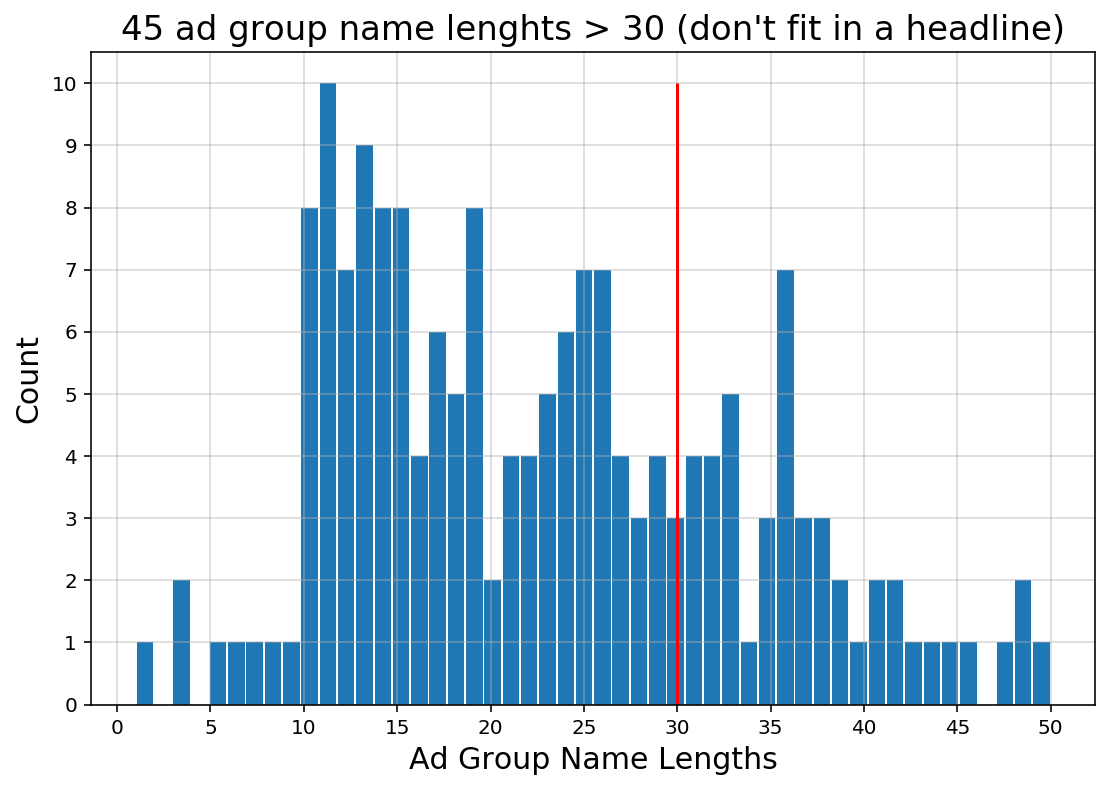

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
adgroup_lengths = pd.Series([len(adgrp) for adgrp in full_keywords_df['Ad Group'].unique()])
long_adgroups = sum(adgroup_lengths > 30)
plt.figure(figsize=(9,6))
plt.hist(adgroup_lengths, rwidth=0.9, bins=50)
plt.vlines(x=30, ymin=0, ymax=10, colors='red')
plt.title(str(long_adgroups) + ' ad group name lenghts > 30 (don\'t fit in a headline)',  fontsize=17)
plt.xlabel('Ad Group Name Lengths', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yticks(range(11))
plt.xticks(range(0, 51, 5))
plt.grid(alpha=0.5)
plt.show()

It seems our problem is not a trivial one, and there is no straightforward way of dealing with it. Ideally, we would like to have the two headlines contain the full title of the product (course) that we are promoting.   
I thought of different ways around it, and decided to write a simple algorithm that splits the name into two phrases, each containing at most thirty characters. 

The algorithm is not suitable for general use, and needs some tweaks to make it general, but it works well enough for this data set. 

In [17]:
def split_string(string, splits=2, max_len=60):
    """Split `string` into `splits` words, each shorter than `max_len` / `splits`"""
    if len(string) < max_len / splits:
        return string, ''
    str_words = string.split(' ')
    result = ''
    for i, word in enumerate(str_words):
        if len(result + ' ' + word) <= max_len / splits:
            result += word + ' '
        else:
            break
    spaces = result.strip().count(' ')
    result2 = string[string[len(result):].index(word) + len(result):]
    return result.strip(), result2

In [18]:
print(split_string('this is a very long course name that needs splitting', 2, 60))
print(split_string('short course name', 2, 60))

('this is a very long course', 'name that needs splitting')
('short course name', '')


This is not something that I do usually, but I like this technique, and I think I'll be using it when creating other campaigns. That's a nice side effect of writing a tutorial!     
Now let's think about the templates that we want to write.   
The general ad template that I use consists of the following elements (typically in this order).         
* **Product**: If I'm searching for 'data science course' on Google, I need to see 'data science course' in the links / ads somewhere.
* **Benefits**: This is the emotinal / psychological thing that people are really after, beyond just completing the course, 'boost your career', 'stand out from the crowd'. 
* **Features**: Now that you've promised me the moon, show me how you are going to get me there! 'over 100 data science courses', 'learn from top experts', 'get instant feedback on your coding skills'. 
* **Call to action**: Ok, so you told me what you have, you motivated me to buy it, and you showed me how I'm going to get there. I'm sold. What do I do now? 'sign up for a free trial', 'sample first chapters for free', 'save 20% on annual subscriptions'

It's not easy to put all these in one ad which is a tweet long, and some of them may overlap. But we will try our best.

### 1. Ad Templates: 

* Headline 1: This will always contain the name of the course (or the first half). 
* Headline 2: The second half of the course name, or one of the following: 
    * Boost Your Data Science Career
    * Stand Out From the Crowd
    * Tackle Complex Questions
* Description: each ad group will have the three variations below and they will rotate.
    * Learn Directly From the Top Experts in the Field. 20% off Annual Subscriptions
    * Get Ahead of the Curve, Master Data Science Skills. $29 / Month. Cancel Anytime
    * Choose From a Wide Variety of Topics Tuaght by the Best in the World. Start Now    

### 2. Crate `Campaign` Columns

In [19]:
full_keywords_df.Campaign.unique()  # just to make sure we have consistent naming conventions

array(['SEM_Instructors', 'SEM_Technologies', 'SEM_Courses', 'SEM_Tracks'], dtype=object)

In [20]:
course_df['Campaign'] = 'SEM_Courses'
course_df = course_df.rename(columns={'name_clean': 'name', 'name': 'old_name'})
course_df.head()

,old_name,url,name,Campaign
0,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Intro to Python for Data Science,SEM_Courses
1,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Introduction to R,SEM_Courses
2,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,Intermediate Python for Data Science,SEM_Courses
3,Intro to SQL for Data Science,https://www.datacamp.com/courses/intro-to-sql-...,Intro to SQL for Data Science,SEM_Courses
4,Intermediate R,https://www.datacamp.com/courses/intermediate-r,Intermediate R,SEM_Courses


In [21]:
instructor_df['Campaign'] = 'SEM_Instructors'
instructor_df.head()

,name,url,Campaign
0,Filip Schouwenaars,https://www.datacamp.com/instructors/filipsch,SEM_Instructors
1,Jonathan Cornelissen,https://www.datacamp.com/instructors/jonathana...,SEM_Instructors
2,Hugo Bowne-Anderson,https://www.datacamp.com/instructors/hugobowne,SEM_Instructors
3,Nick Carchedi,https://www.datacamp.com/instructors/nickyc,SEM_Instructors
4,Greg Wilson,https://www.datacamp.com/instructors/greg48f64...,SEM_Instructors


In [22]:
tracks_df['Campaign'] = 'SEM_Tracks'
tracks_df.head()

,name,url,Campaign
0,R Programming,https://www.datacamp.com/tracks/r-programming,SEM_Tracks
1,Importing Cleaning Data With R,https://www.datacamp.com/tracks/importing-clea...,SEM_Tracks
2,Data Manipulation With R,https://www.datacamp.com/tracks/data-manipulat...,SEM_Tracks
3,Python Programming,https://www.datacamp.com/tracks/python-program...,SEM_Tracks
4,Importing Cleaning Data With Python,https://www.datacamp.com/tracks/importing-clea...,SEM_Tracks


In [23]:
tech_domain = 'https://www.datacamp.com/courses/tech:'
tech_domain_list = []
for tech in ['R', 'Python', 'SQL', 'Git', 'Shell']:
    tech_domain_list.append((tech, tech_domain + tech))
tech_df = pd.DataFrame.from_records(tech_domain_list, columns=['name', 'url'])
tech_df['Campaign'] = 'SEM_Technologies'
tech_df

,name,url,Campaign
0,R,https://www.datacamp.com/courses/tech:R,SEM_Technologies
1,Python,https://www.datacamp.com/courses/tech:Python,SEM_Technologies
2,SQL,https://www.datacamp.com/courses/tech:SQL,SEM_Technologies
3,Git,https://www.datacamp.com/courses/tech:Git,SEM_Technologies
4,Shell,https://www.datacamp.com/courses/tech:Shell,SEM_Technologies


### 3. Merge All (name, url) Data Frames

In [24]:
full_ads_df = pd.concat([course_df[['Campaign', 'name', 'url']],
                        instructor_df,
                        tracks_df,
                        tech_df], ignore_index=True)
full_ads_df = full_ads_df.rename(columns={'name': 'Ad Group', 'url': 'Final URL'})
print('total rows:', full_ads_df.shape[0])
n_adgroups = full_ads_df.shape[0]
full_ads_df.head()

total rows: 185


,Campaign,Ad Group,Final URL
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...
3,SEM_Courses,Intro to SQL for Data Science,https://www.datacamp.com/courses/intro-to-sql-...
4,SEM_Courses,Intermediate R,https://www.datacamp.com/courses/intermediate-r


### 4. Generate Ads (insert templates)

Just to keep track of where we are. We now have the ads data frame containg `Campaign`, `Ad Group`, and `Final URL` columns properly mapped. We need to add the `Headline 1`, `Headline 2`, and `Description` Fields. Keep in mind that for each ad group we will be adding three different ad variation. This is a good practice mainly for testing purposes, to see what people click on, which ads convert more, etc. We should end up with a data frame that has three times number of rows of the current one.    

Let's start by duplicating each row three times, in the `full_ads_df`:

In [25]:
full_ads_df = full_ads_df.iloc[[x  for x in range(n_adgroups) for i in range(3)], :] 
print('total rows:', full_ads_df.shape[0])
full_ads_df.head(9)

total rows: 555


,Campaign,Ad Group,Final URL
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...


We now add the three different descriptions we created above. 

In [26]:
Description = [
    'Learn Directly From the Top Experts in the Field. 20% off Annual Subcriptions',
    'Be Ahead of the Curve, Master Data Science Skills. $29 / Month. Cancel Anytime',
    'Choose From a Wide Variety of Topics Tuaght by the Best in the World. Start Now'   
]
Description = [x for i in range(n_adgroups) for x in Description ]
full_ads_df['Description'] = Description
full_ads_df.head()

,Campaign,Ad Group,Final URL,Description
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Learn Directly From the Top Experts in the Fie...
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,"Be Ahead of the Curve, Master Data Science Ski..."
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Choose From a Wide Variety of Topics Tuaght by...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Learn Directly From the Top Experts in the Fie...
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,"Be Ahead of the Curve, Master Data Science Ski..."


Next we add `Headline 1` and `Headline 2` to the data frame. We are almost done!

In [27]:
benefits = [
    'Boost Your Data Science Career',
    'Stand Out From the Crowd',
    'Tackle Complex Questions'    
]

The benefits will be included as `Headline 2` in the cases where the length of the ad group is 30 or less. In this case we would have an empty field, which we will fill with one of the benefits that we have. 

In [28]:
benefits = [x for i in range(n_adgroups) for x in benefits]
headlines = [split_string(x) for x in full_ads_df['Ad Group']]
full_ads_df['Headline 1'] = [x[0] for x in headlines]
full_ads_df['Headline 2'] = [x[1] if x[1] else benefits[i] for i, x in enumerate(headlines)]
print('total ads:', full_ads_df.shape[0])
full_ads_df.head(9)

total ads: 555


,Campaign,Ad Group,Final URL,Description,Headline 1,Headline 2
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Learn Directly From the Top Experts in the Fie...,Intro to Python for Data,Science
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,"Be Ahead of the Curve, Master Data Science Ski...",Intro to Python for Data,Science
0,SEM_Courses,Intro to Python for Data Science,https://www.datacamp.com/courses/intro-to-pyth...,Choose From a Wide Variety of Topics Tuaght by...,Intro to Python for Data,Science
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Learn Directly From the Top Experts in the Fie...,Introduction to R,Boost Your Data Science Career
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,"Be Ahead of the Curve, Master Data Science Ski...",Introduction to R,Stand Out From the Crowd
1,SEM_Courses,Introduction to R,https://www.datacamp.com/courses/free-introduc...,Choose From a Wide Variety of Topics Tuaght by...,Introduction to R,Tackle Complex Questions
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,Learn Directly From the Top Experts in the Fie...,Intermediate Python for Data,Science
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,"Be Ahead of the Curve, Master Data Science Ski...",Intermediate Python for Data,Science
2,SEM_Courses,Intermediate Python for Data Science,https://www.datacamp.com/courses/intermediate-...,Choose From a Wide Variety of Topics Tuaght by...,Intermediate Python for Data,Science


As you can see "Intro to Python for Data Science" was long enough to take two fields, so we keep it as is, to keep it clear. In the second case "Introduction to R" fits in the first headline, so we insert the three different benefits that we created in `Headline 2`.    
And we are done!    
Just a quick check, to make sure that all campaign and ad group names in both data frames are the same.

In [29]:
ads_check = (full_ads_df[['Campaign', 'Ad Group']]
             .drop_duplicates()
             .sort_values(['Campaign', 'Ad Group'])
             .reset_index(drop=True))
keywords_check = (full_keywords_df[['Campaign', 'Ad Group']]
                  .drop_duplicates()
                  .sort_values(['Campaign', 'Ad Group'])
                  .reset_index(drop=True))

all(ads_check == keywords_check)

True

In [30]:
full_ads_df.to_csv('ads.csv', index=False)

With the two csv files we have now, we can upload them and start running our campaigns. We will need to set daily budgets, geo-targeting and a few other parameters, but mostly we are good to go. 

You can check them out here: 

[keywords](../blob/master/keywords.csv)    
[ads](../blob/master/ads.csv)

I hope you found that useful. 
Thanks for reading. 